In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    r2_score,
    mean_squared_error,
)

Text(0, 0.5, 'X2')

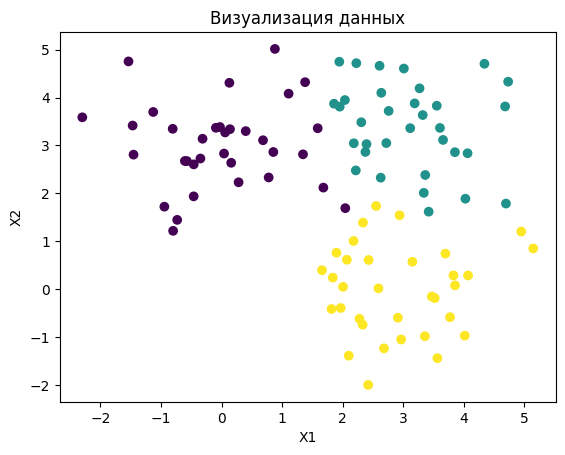

In [44]:
RANDOM_SEED = 0
X, y = make_blobs(
    n_samples=100,
    centers=[(0, 3), (3, 3), (3, 0)],
    n_features=2,
    random_state=RANDOM_SEED,
    cluster_std=(0.9, 0.9, 0.9),
)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Визуализация данных")
plt.xlabel("X1")
plt.ylabel("X2")


In [45]:
depth = 4
clf_tree = DecisionTreeClassifier(
    criterion="entropy", max_depth=depth, random_state=RANDOM_SEED
)
clf_tree.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

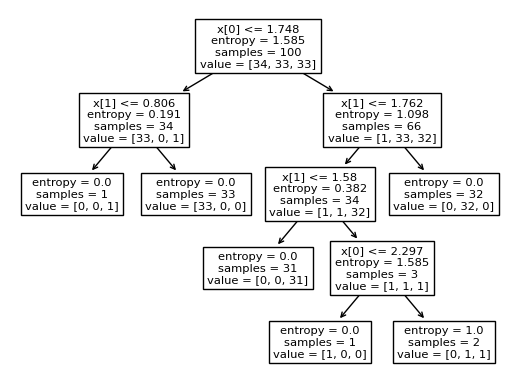

In [46]:
tree.plot_tree(clf_tree)
plt.show()


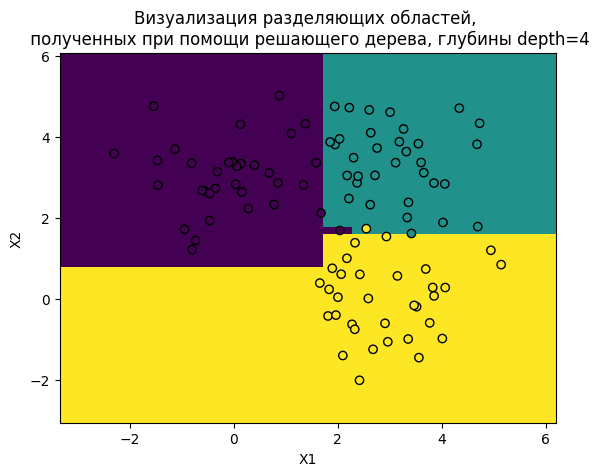

In [47]:
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(
    X0_grid.shape
)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="black", linewidth=1)

plt.title(
    "Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}".format(
        depth
    )
)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [48]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy =", accuracy_score(y, y_pred))
print("F1_score =", f1_score(y, y_pred, average="micro"))


[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [49]:
observation_new = [[2, 1]]

In [50]:
clf_tree.predict(observation_new)

array([2])

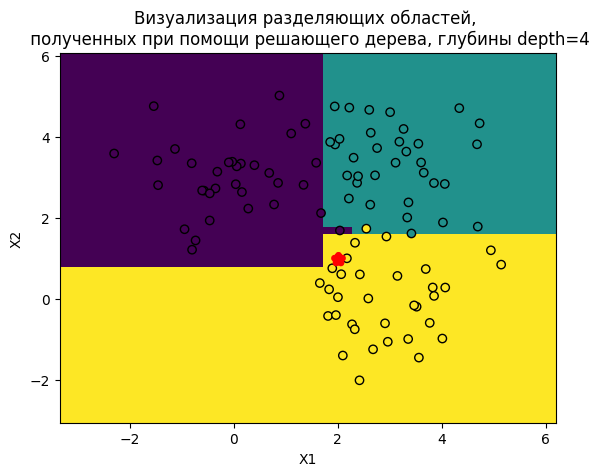

In [51]:
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(
    X0_grid.shape
)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="black", linewidth=1)
plt.scatter(
    observation_new[0][0], observation_new[0][1], color="red", marker="*", linewidth=5
)

plt.title(
    "Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}".format(
        depth
    )
)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


## Задача регрессии


In [52]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X**2) + np.random.normal(0.0, 0.1, X.shape[0])


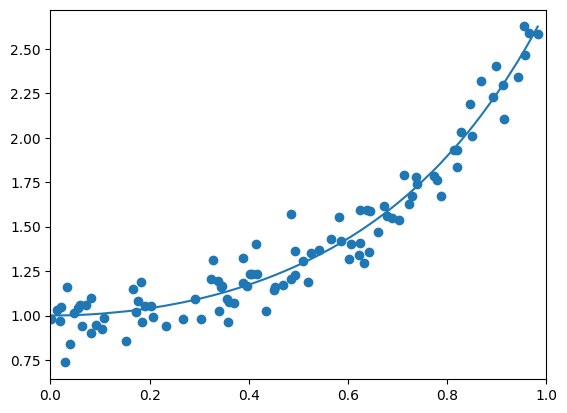

In [53]:
plt.scatter(X, y)
plt.xlim(0, 1)
plt.plot(X, np.exp(X**2))


In [54]:
depth = 3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3, random_state=0)

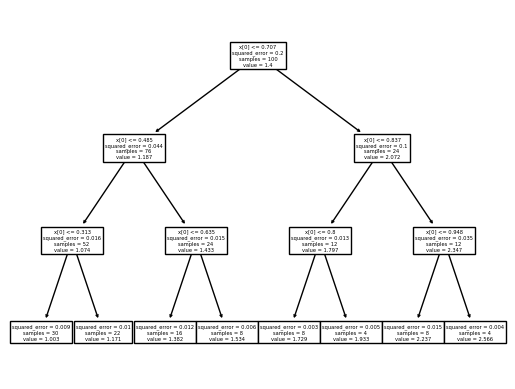

In [55]:
tree.plot_tree(reg_tree)
plt.show()


Text(0, 0.5, 'y')

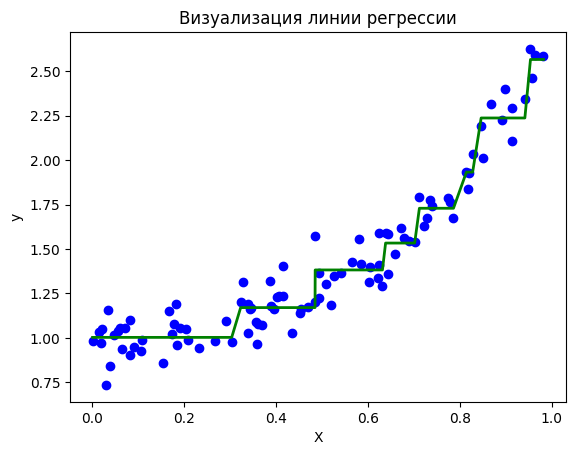

In [56]:
y_pred_reg = reg_tree.predict(X.reshape(-1, 1))

plt.scatter(X, y, c="b")

plt.plot(X, y_pred_reg, "g", lw=2)

plt.title("Визуализация линии регрессии")
plt.xlabel("X")
plt.ylabel("y")


In [57]:
print("r2 =", r2_score(y, y_pred_reg))
print("MSE =", mean_squared_error(y, y_pred_reg))


r2 = 0.9540354524905691
MSE = 0.009189418426038376


Text(0, 0.5, 'y')

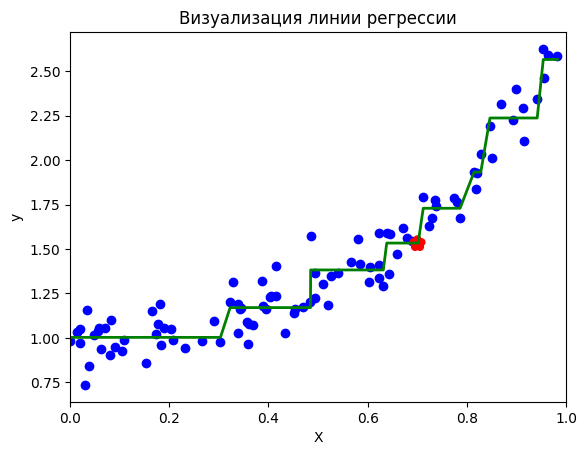

In [58]:
observation_new = [[0.7]]


plt.scatter(X, y, c="b")
plt.xlim(0, 1)
plt.scatter(
    0.7, reg_tree.predict(observation_new), color="red", linewidths=6, marker="*"
)

plt.plot(X, y_pred_reg, "g", lw=2)

plt.title("Визуализация линии регрессии")
plt.xlabel("X")
plt.ylabel("y")

---

# Самостоятельная работа


1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.


In [59]:
iris = load_iris()

In [60]:
X = iris.data[:, -2:]
y = iris.target

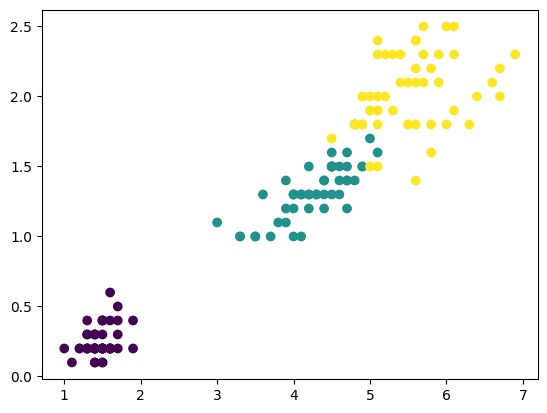

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y)

---
2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.


In [62]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

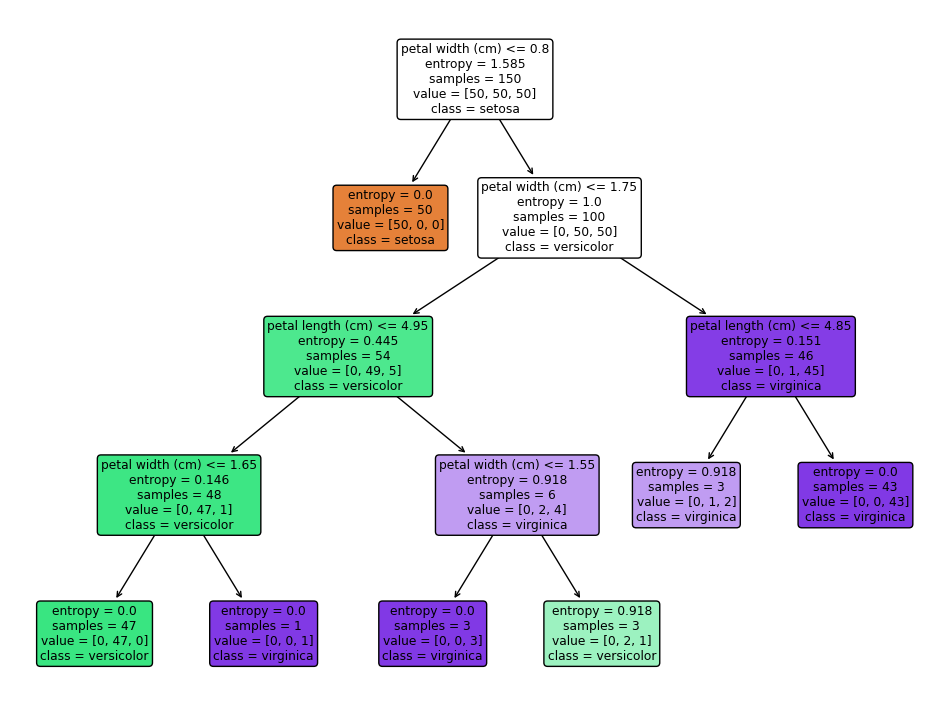

In [63]:
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=0)
clf_tree.fit(X, y)
plt.figure(figsize=(12, 9))
tree.plot_tree(
    clf_tree,
    feature_names=list(iris.feature_names[-2:]),
    class_names=list(iris.target_names),
    filled=True,
    rounded=True,
)
plt.show()

---
3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.


In [64]:
def visualize(X, y, title):
    X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])


    X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(
        X0_grid.shape
    )
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="black", linewidth=1)

    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

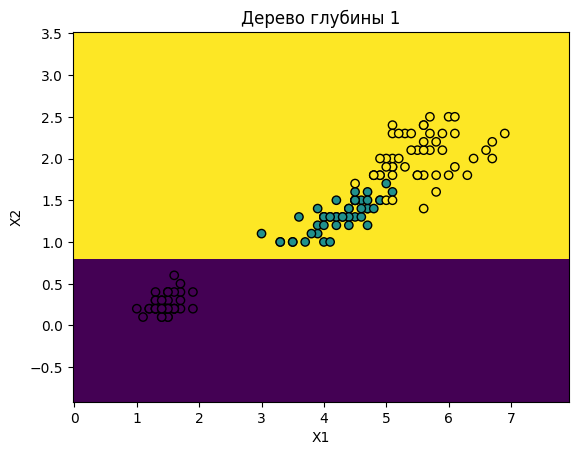

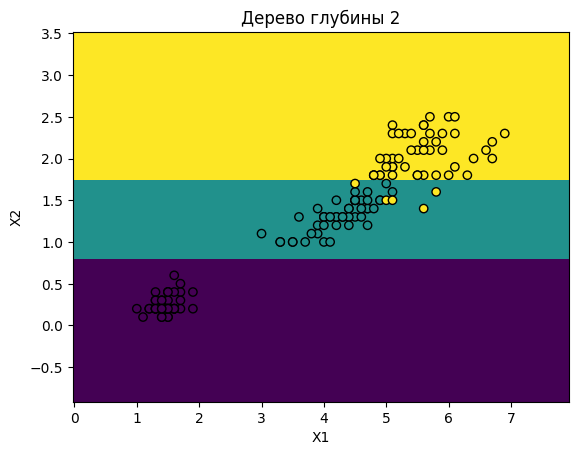

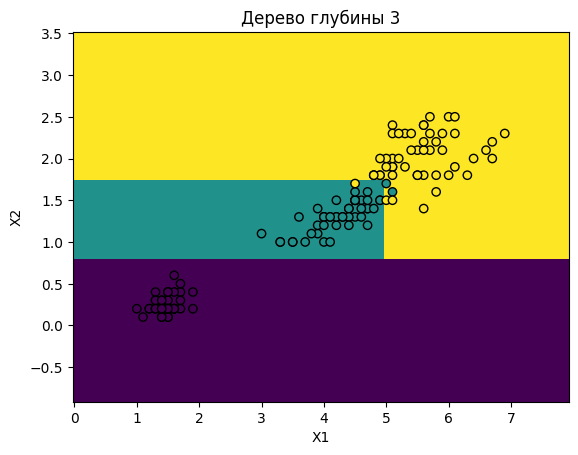

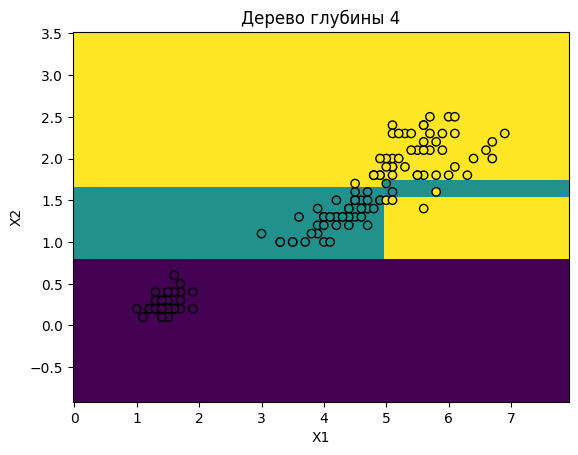

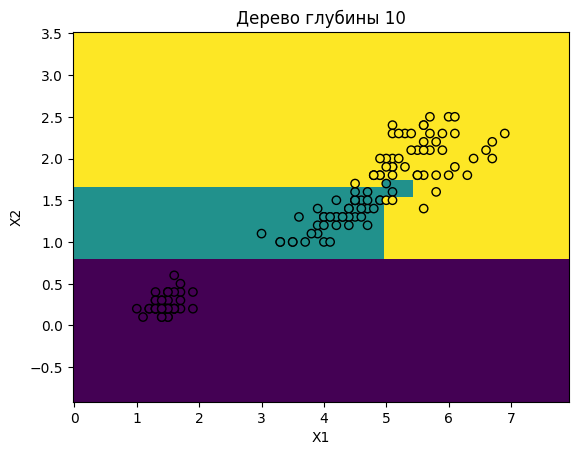

In [65]:
models = []
for depth in (1, 2, 3, 4, 10):
    clf_tree = DecisionTreeClassifier(
        criterion="entropy", max_depth=depth, random_state=0
    )
    clf_tree.fit(X, y)
    visualize(
        X,
        y,
        title=f"Дерево глубины {depth}",
    )
    models.append(clf_tree)

---
4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.


In [66]:
for model in models:
    y_pred = model.predict(X)
    print('-'*10)
    print(f"Модель глубины {model.max_depth}")
    print("Accuracy =", accuracy_score(y, y_pred))
    print("F1_score =", f1_score(y, y_pred, average="micro"))
    print()

----------
Модель глубины 1
Accuracy = 0.6666666666666666
F1_score = 0.6666666666666666

----------
Модель глубины 2
Accuracy = 0.96
F1_score = 0.96

----------
Модель глубины 3
Accuracy = 0.9733333333333334
F1_score = 0.9733333333333334

----------
Модель глубины 4
Accuracy = 0.9866666666666667
F1_score = 0.9866666666666668

----------
Модель глубины 10
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333



Лучше всего работает модель с макисимальной глубиной (10)

---
5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [67]:
X = iris.data

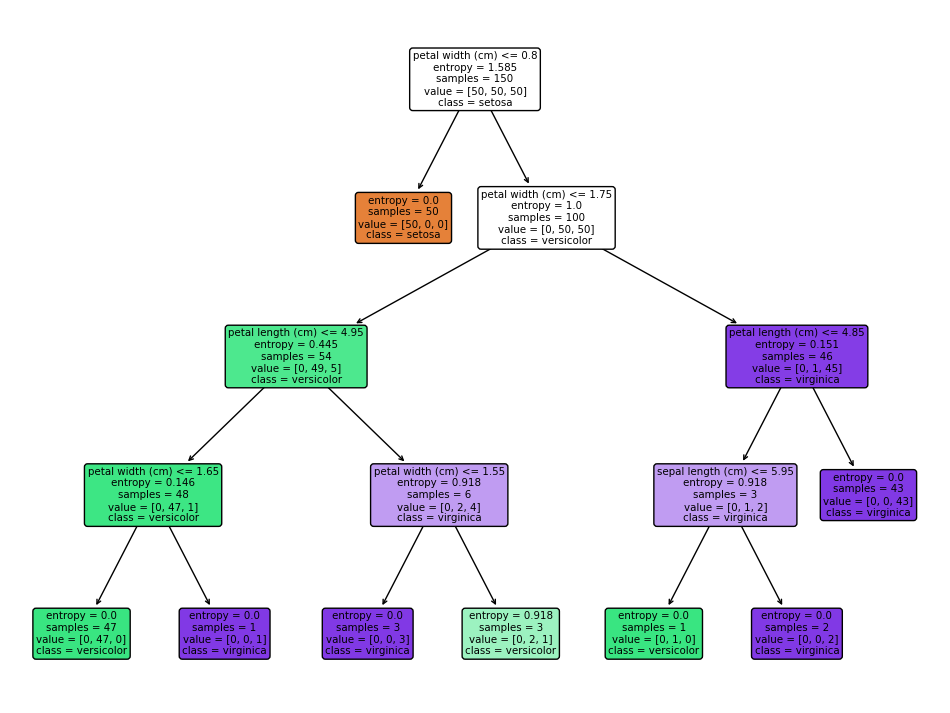

[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
Модель глубины 4
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333


In [68]:
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=0)
clf_tree.fit(X, y)

plt.figure(figsize=(12, 9))
tree.plot_tree(
    clf_tree,
    feature_names=list(iris.feature_names),
    class_names=list(iris.target_names),
    filled=True,
    rounded=True,
)
plt.show()

y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print(f"Модель глубины {clf_tree.max_depth}")
print("Accuracy =", accuracy_score(y, y_pred))
print("F1_score =", f1_score(y, y_pred, average="micro"))

---
6. Загрузите встроенные данные `sklearn.datasets.fetch_california_housing`, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [69]:
houses_dataset = fetch_california_housing()

In [70]:
houses = pd.DataFrame(houses_dataset.data, columns=houses_dataset.feature_names)
y = houses_dataset.target
X = houses[['AveBedrms']]

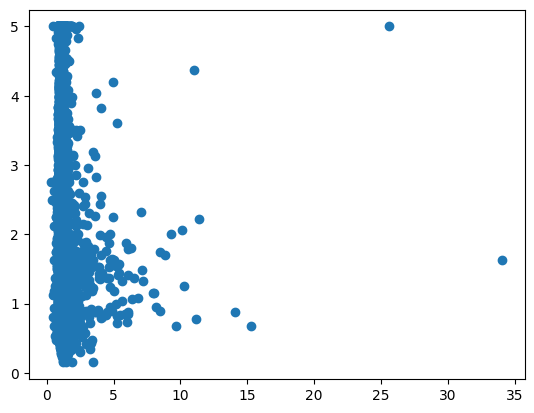

In [71]:
plt.scatter(X, y)

---
7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [72]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X, y)
y_pred = model.predict(X)

---
8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

In [73]:
# Отображаем граф в текстовом формате, в другом слишком долго
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 1.10
|   |--- feature_0 <= 0.93
|   |   |--- feature_0 <= 0.92
|   |   |   |--- feature_0 <= 0.70
|   |   |   |   |--- feature_0 <= 0.53
|   |   |   |   |   |--- feature_0 <= 0.47
|   |   |   |   |   |   |--- feature_0 <= 0.41
|   |   |   |   |   |   |   |--- feature_0 <= 0.35
|   |   |   |   |   |   |   |   |--- value: [2.75]
|   |   |   |   |   |   |   |--- feature_0 >  0.35
|   |   |   |   |   |   |   |   |--- value: [2.50]
|   |   |   |   |   |   |--- feature_0 >  0.41
|   |   |   |   |   |   |   |--- value: [0.80]
|   |   |   |   |   |--- feature_0 >  0.47
|   |   |   |   |   |   |--- feature_0 <= 0.51
|   |   |   |   |   |   |   |--- value: [2.96]
|   |   |   |   |   |   |--- feature_0 >  0.51
|   |   |   |   |   |   |   |--- value: [2.50]
|   |   |   |   |--- feature_0 >  0.53
|   |   |   |   |   |--- feature_0 <= 0.57
|   |   |   |   |   |   |--- feature_0 <= 0.54
|   |   |   |   |   |   |   |--- value: [0.94]
|   |   |   |   |   |   |--- feature_0 >  0.54
|  

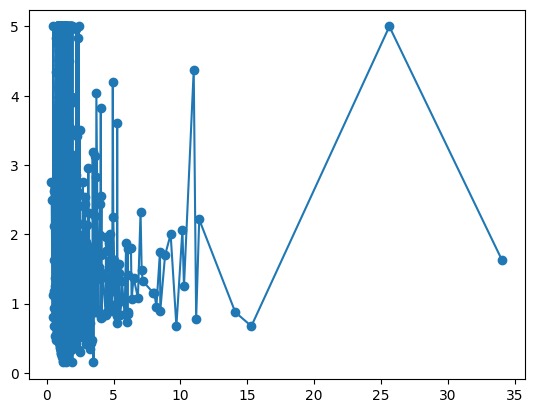

In [74]:
plt.scatter(X, y)
mask = X.values.ravel().argsort()
plt.plot(X.values[mask], y[mask])

---
9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [75]:
# Точность у модели получилась не самая большая, возможно из-за выбросов
model.score(X, y)

0.679172913720798

c:\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


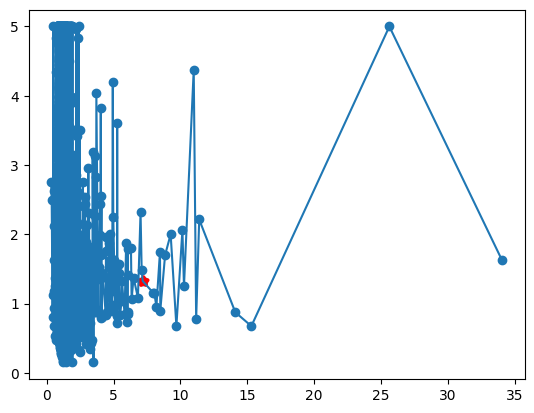

In [76]:
plt.scatter(X, y)
mask = X.values.ravel().argsort()
val = 7.2
plt.plot(X.values[mask], y[mask])
plt.scatter(val, model.predict([[val]])[0], marker="*", lw=3, c="red")

---
10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.


In [77]:
model = DecisionTreeRegressor(random_state=0)
# Обучаем модель
model.fit(houses, y)

DecisionTreeRegressor(random_state=0)

In [78]:
# Модель получилась максимального качества
model.score(houses, y)

1.0

In [79]:
# Отображаем граф в текстовом формате, в другом слишком долго
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 5.04
|   |--- feature_0 <= 3.07
|   |   |--- feature_2 <= 4.31
|   |   |   |--- feature_0 <= 2.21
|   |   |   |   |--- feature_2 <= 3.32
|   |   |   |   |   |--- feature_5 <= 3.13
|   |   |   |   |   |   |--- feature_4 <= 1209.50
|   |   |   |   |   |   |   |--- feature_6 <= 37.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 34.01
|   |   |   |   |   |   |   |   |   |--- feature_7 <= -117.13
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 33.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  33.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- feature_7 >  -117.13
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 1.20
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  1.20
|   |   |   |   |   |   |   |   |  